# VEST VA 2017 Senate of Virginia  Special Election - Districts 

In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
pd.set_option('display.max_columns', None)

## Load VEST file

In [4]:
gdfv = gp.read_file('./raw_from_source/va_2017_statesenate_special/va_2017_statesenate_special.shp')
gdfv.head()

,COUNTYFP,LOCALITY,VTDST,PRECINCT,SOV_DIST,S17SOVDEM,S17SOVREP,S17SOVIND,S17SOVLIB,S17SOVWRI,geometry
0,036,Charles City County,000301,Precinct 3-1,009,148,0,0,33,1,"POLYGON ((-77.03838 37.42918, -77.03800 37.429..."
1,085,Hanover County,000101,Ashland,009,223,0,0,18,4,"POLYGON ((-77.44853 37.76165, -77.44839 37.761..."
2,085,Hanover County,000105,Berkley,009,140,0,0,12,2,"POLYGON ((-77.49963 37.77219, -77.49882 37.772..."
3,085,Hanover County,000210,Oak Hill,009,32,0,0,7,1,"POLYGON ((-77.54274 37.74420, -77.54270 37.744..."
4,085,Hanover County,000704,Elmont,009,78,0,0,23,1,"POLYGON ((-77.55298 37.73593, -77.55279 37.735..."


In [5]:
county_dict = pd.Series(gdfv['COUNTYFP'].values, index = gdfv['LOCALITY']).to_dict()

## Load election results

### **District 9**

In [6]:
df9 = pd.read_csv('./raw_from_source/Virginia_Elections_Database__2017_Senate_of_Virginia_Special_General_Election_District_9_including_precincts.csv')
df9.head()

,County/City,Ward,Pct,Jennifer Leigh McClellan,Corey Maurice Fauconier,All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,Libertarian,NaN,NaN
1,Charles City County,-,101 - Precinct 1-1,88,17,1.0,106
2,Charles City County,-,201 - Precinct 2-1,90,10,0.0,100
3,Charles City County,-,301 - Precinct 3-1,140,32,1.0,173
4,Charles City County,-,Ab - Central Absentee Precinct,19,1,1.0,21


In [7]:
df9 = df9.iloc[1:]
df9['SOV_DIST'] = '009'
df9['LOCALITY'] = df9['County/City']
df9['S17SOVDEM'] = df9['Jennifer Leigh McClellan'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df9['S17SOVLIB'] = df9['Corey Maurice Fauconier'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df9['S17SOVWRI'] = df9['All Others'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df9 = df9.drop(['County/City', 'Jennifer Leigh McClellan', 'Corey Maurice Fauconier', 'All Others', 'Ward'], axis = 1)

print(df9.LOCALITY.nunique())
df9['COUNTYFP'] = df9['LOCALITY'].map(county_dict)
print(df9.COUNTYFP.nunique())

5
4


In [8]:
df9

,Pct,Total Votes Cast,SOV_DIST,LOCALITY,S17SOVDEM,S17SOVLIB,S17SOVWRI,COUNTYFP
1,101 - Precinct 1-1,106,009,Charles City County,88,17,1,036
2,201 - Precinct 2-1,100,009,Charles City County,90,10,0,036
3,301 - Precinct 3-1,173,009,Charles City County,140,32,1,036
4,Ab - Central Absentee Precinct,21,009,Charles City County,19,1,1,036
5,Provisional,0,009,Charles City County,0,0,0,036
...,...,...,...,...,...,...,...,...
76,607 - Six Hundred Seven,77,009,Richmond City,74,3,0,760
77,708 - Seven Hundred Eight,27,009,Richmond City,25,2,0,760
78,Ab - Central Absentee Precinct,57,009,Richmond City,57,0,0,760
79,Provisional,1,009,Richmond City,1,0,0,760


### **District 22**

In [9]:
df22 = pd.read_csv('./raw_from_source/Virginia_Elections_Database__2017_Senate_of_Virginia_Special_General_Election_District_22_including_precincts.csv')
df22.head()

,County/City,Ward,Pct,Mark Joseph Peake,Ryant Lenard Washington,Joseph Cornwell Hines,All Others,Total Votes Cast
0,NaN,NaN,NaN,Republican,Democratic,Independent,NaN,NaN
1,Amherst County,-,101 - Wright Shop,108,176,3,0.0,287
2,Amherst County,-,102 - New Glasgow,174,89,5,0.0,268
3,Amherst County,-,103 - Coolwell,110,24,2,0.0,136
4,Amherst County,-,201 - Court House,418,215,26,0.0,659


In [10]:
df22 = df22.iloc[1:]
df22['SOV_DIST'] = '022'
df22['LOCALITY'] = df22['County/City']
df22['S17SOVDEM'] = df22['Ryant Lenard Washington'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df22['S17SOVREP'] = df22['Mark Joseph Peake'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df22['S17SOVIND'] = df22['Joseph Cornwell Hines'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df22['S17SOVWRI'] = df22['All Others'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df22 = df22.drop(['County/City', 'Ryant Lenard Washington', 'Mark Joseph Peake', 'Joseph Cornwell Hines', 'All Others', 'Ward'], axis = 1)

print(df22.LOCALITY.nunique())
df22['COUNTYFP'] = df22['LOCALITY'].map(county_dict)
print(df22.COUNTYFP.nunique())

10
9


In [11]:
df22.head()

,Pct,Total Votes Cast,SOV_DIST,LOCALITY,S17SOVDEM,S17SOVREP,S17SOVIND,S17SOVWRI,COUNTYFP
1,101 - Wright Shop,287,022,Amherst County,176,108,3,0,009
2,102 - New Glasgow,268,022,Amherst County,89,174,5,0,009
3,103 - Coolwell,136,022,Amherst County,24,110,2,0,009
4,201 - Court House,659,022,Amherst County,215,418,26,0,009
5,202 - Temperance,199,022,Amherst County,40,155,4,0,009


### **Districts 9 and 22 together**

In [12]:
elections = []
elections.append(df9)
elections.append(df22)

df = pd.concat(elections, axis = 0)
df = df[df['LOCALITY'] != 'TOTALS']
df = df.reset_index()
df = df.fillna(0)

## Check race totals and county-by-county totals

In [13]:
#Function to check column/race totals
def colum_total_check(column_list, elections_df, vest_df):
    for val in column_list:
        vote_dif = elections_df[val].sum()-vest_df[val].sum()
        if (vote_dif == 0):
            print(val+": EQUAL", ' - total: ', str(elections_df[val].sum()))
        else:
            print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES", ' - rdh total: ', str(elections_df[val].sum()), ', vest total: ', str(vest_df[val].sum()))
            
#Function to check county totals
def county_total_check(column_list, elections_df, vest_df):
    print("Counties with differences printed below:")
    diff_counties=[]
    for i in column_list:
        diff = elections_df.groupby(["COUNTYFP"]).sum()[i]-vest_df.groupby(["COUNTYFP"]).sum()[i]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):
            print(i)
            print(diff[diff != 0].to_string(header=False))
    print("")
    print("All other races in all counties are equal")

In [14]:
column_list = ['S17SOVDEM','S17SOVREP', 'S17SOVIND', 'S17SOVLIB', 'S17SOVWRI']

In [15]:
colum_total_check(column_list, df, gdfv)

S17SOVDEM: EQUAL  - total:  18075
S17SOVREP: EQUAL  - total:  13713.0
S17SOVIND: EQUAL  - total:  1884.0
S17SOVLIB: EQUAL  - total:  692.0
S17SOVWRI: EQUAL  - total:  74


In [16]:
county_total_check(column_list, df, gdfv)

Counties with differences printed below:

All other races in all counties are equal


## Absentee Vote Reallocation

In [17]:
#Create dfs that are groupbys based on needed categories for comparison - with and without absentee - to set up for reallocation fxn
df = df.reset_index()

absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['COUNTYFP']).sum()
groupby_county_df_tot = df.groupby(['COUNTYFP']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('COUNTYFP').sum()

#Copy dfs to set up for reallocation to create new df
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

In [18]:
## PH CODE for vote allocation adapted by LF to be functions

#Create some new columns for each of these races to deal with the allocation
def rounding_columns_creation(column_list, elections_df):
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        elections_df.loc[:,add_var]=0.0
        elections_df.loc[:,rem_var]=0.0
        elections_df.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
def iterate_df_to_add_rounding(column_list, df_no_absent_or_provisional, elections_df, precinct_specific_totals, to_dole_out_totals, county_id_column):
    for index, row in df_no_absent_or_provisional.iterrows():
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #Grab the district(/county)
            county_id = row[county_id_column]
            #Get the denominator for the allocation (the precinct vote totals)
            denom = precinct_specific_totals.loc[precinct_specific_totals[county_id_column]==county_id][race]
            #Get one of the numerators, how many districtwide votes to allocate
            numer = to_dole_out_totals.loc[to_dole_out_totals[county_id_column]==county_id][race]
            #Get the vote totals for this race in this precinct
            val = elections_df.at[index,race]
            #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
            if ((float(denom)==0)):
                vote_share = 0
            else:
                vote_share = (float(val)/float(denom))*float(numer)
            elections_df.at[index,add_var] = vote_share
            #Take the decimal remainder of the allocation
            elections_df.at[index,rem_var] = vote_share%1
            #Take the floor of the allocation
            elections_df.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(elections_df.groupby([county_id_column]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[county_id_column].unique()) 

    #Iterate over the county/district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[county_id_column]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in elections_df.loc[elections_df[county_id_column]==county][rem_var].nlargest(to_go).index:
                elections_df.at[index,add_var] = np.ceil(elections_df.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        elections_df.loc[:,add_var]=np.floor(elections_df.loc[:,add_var])
        elections_df.loc[:,race]+=elections_df.loc[:,add_var]
        
def absentee_reallocation(column_list, elections_df, df_no_absent_or_provisional, precinct_specific_totals, to_dole_out_totals, county_id_column):
    rounding_columns_creation(column_list, elections_df)
    iterate_df_to_add_rounding(column_list, df_no_absent_or_provisional, elections_df, precinct_specific_totals, to_dole_out_totals, county_id_column)
    print("Absentee reallocation complete!")

In [19]:
#call absentee reallocation fxn
absentee_reallocation(column_list, df_with_absentee_reallocated, df_no_absent_or_provisional, precinct_specific_totals, to_dole_out_totals, "COUNTYFP")

Absentee reallocation complete!


### re-check vote totals post reallocation

In [20]:
#Run function to check race tots
colum_total_check(column_list, df_with_absentee_reallocated, gdfv)

S17SOVDEM: EQUAL  - total:  18075.0
S17SOVREP: EQUAL  - total:  13713.0
S17SOVIND: EQUAL  - total:  1884.0
S17SOVLIB: EQUAL  - total:  692.0
S17SOVWRI: EQUAL  - total:  74.0


In [21]:
#Run function to check county tots
county_total_check(column_list, df_with_absentee_reallocated, gdfv)

Counties with differences printed below:

All other races in all counties are equal


## Create unique id

In [23]:
#Function to fix/account for above differences
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [24]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3).apply(vtdst_changer)

df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.vtdst
gdfv['unique_id'] = gdfv.COUNTYFP + gdfv.VTDST.str.slice(start = 3)
print('unique ids in df not in vest file: ', set(df_with_absentee_reallocated.unique_id) - set(gdfv.unique_id))
print('unique ids in vest file not in df: ', set(gdfv.unique_id) - set(df_with_absentee_reallocated.unique_id))

unique ids in df not in vest file:  {'109501'}
unique ids in vest file not in df:  set()


In [25]:
#The one id in df not in vest file is zero vote precinct, so can be ignored for election results validation
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '109501']

,level_0,index,Pct,Total Votes Cast,SOV_DIST,LOCALITY,S17SOVDEM,S17SOVLIB,S17SOVWRI,COUNTYFP,S17SOVREP,S17SOVIND,S17SOVDEM_add,S17SOVDEM_rem,S17SOVDEM_floor,S17SOVREP_add,S17SOVREP_rem,S17SOVREP_floor,S17SOVIND_add,S17SOVIND_rem,S17SOVIND_floor,S17SOVLIB_add,S17SOVLIB_rem,S17SOVLIB_floor,S17SOVWRI_add,S17SOVWRI_rem,S17SOVWRI_floor,vtdst,unique_id
141,141,63,501 - Fredericks Hall,0,022,Louisa County,0.0,0.0,0.0,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,501,109501


### Join attempt 1 - election results to vest to check precinct totals

In [26]:
join_1_df_vest = pd.merge(df_with_absentee_reallocated, gdfv, on = 'unique_id', how = 'outer', indicator = True)
print(join_1_df_vest["_merge"].value_counts())

both          147
left_only       1
right_only      0
Name: _merge, dtype: int64


## Preliminary precinct level election result comparison

In [27]:
def validater_row (df, column_list, precinct_id):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_list:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>1): #7/12/21 LF mod to be >1 instead of >0 to print fewer results
                    print(i, "{:.>72}".format(df.iloc[j][precinct_id]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j][precinct_id])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j][precinct_id])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()

In [28]:
validater_row(join_1_df_vest[join_1_df_vest['_merge'] == 'both'].sort_values('unique_id'), column_list, "unique_id")


There are  147  total rows
19  of these rows have election result differences
128  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 10


## Shapefile

In [29]:
def load_in_census_phase_2_release_shp(parent_directory, geog_level, vest_gdf):
    '''geog_level usually equal 'vtd' for rdh purposes, and needs to be in quotes. Check string for other geog levels. '''
    #Collect county fips to iterate over
    county_fips = []
    for directory in os.listdir(parent_directory):
        if not directory[0] == '.':
            county_fips.append(directory[-5:])
    #load in geographies
    county_geog = []
    for i in county_fips:
        ref = parent_directory + 'partnership_shapefiles_19v2_'
        geog_ref = ref + i + '/PVS_19_v2_' + geog_level +'_' + i + '.shp' 
        geog_shp = gp.read_file(geog_ref)
        #print(i, ' added to list')
        county_geog.append(geog_shp)
    
    global proj
    proj = vest_gdf.crs
    global shp_geog_name
    shp_geog_name = gp.GeoDataFrame(pd.concat(county_geog, axis = 0) , crs = proj) 

In [30]:
parent_directory = './raw_from_source/census_shps_by_county_all_unzip/'
#Load in precinct shapefile
load_in_census_phase_2_release_shp(parent_directory, 'vtd', gdfv)
vtd_shp = shp_geog_name
#Load in state senate district shapefile
load_in_census_phase_2_release_shp(parent_directory, 'sldu', gdfv)
#filter for relevant districts
sldu_shp = shp_geog_name[(shp_geog_name.SLDUST == '009')|(shp_geog_name.SLDUST == '022')]
#overlay precinct and senate districts
shp = gp.overlay(sldu_shp, vtd_shp, how = 'intersection', make_valid=True, keep_geom_type=True)

virginia precincts:
senate districts 9 and 22:
senate districts/precinct overlay:


<AxesSubplot:>

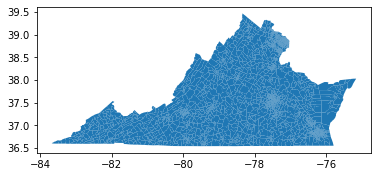

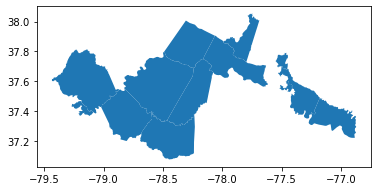

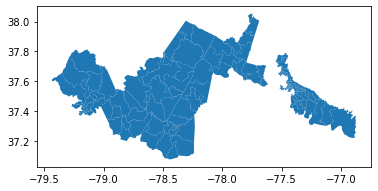

In [31]:
print("virginia precincts:")
vtd_shp.plot()
print("senate districts 9 and 22:")
sldu_shp.plot()
print('senate districts/precinct overlay:')
shp.plot()

### SHP unique id

In [33]:
#assign shp unique id
shp['unique_id'] = shp['COUNTYFP_1'] + shp['VTDST'].str.slice(start = 3)
print('unique_id in shp not in vest file',set(shp.unique_id) - set(gdfv.unique_id))
print('unique_id in vest file not shp',set(gdfv.unique_id) - set(shp.unique_id))

unique_id in shp not in vest file {'680101', '760706'}
unique_id in vest file not shp set()


In [64]:
print('unique_id in shp not in vest file',set(shp.unique_id) - set(df_with_absentee_reallocated.unique_id), "shp shape: ", shp.shape)
print('unique_id in vest file not shp',set(df_with_absentee_reallocated.unique_id) - set(shp.unique_id), "df shape: ", df_with_absentee_reallocated.shape)

unique_id in shp not in vest file {'680101', '760706'} shp shape:  (149, 43)
unique_id in vest file not shp {'109501'} df shape:  (148, 29)


In [34]:
shp.shape

(149, 43)

<AxesSubplot:>

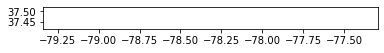

In [35]:
shp[(shp['unique_id'] == '680101')|(shp['unique_id'] == '760706')].plot()

In [65]:
shp[(shp['unique_id'] == '680101')|(shp['unique_id'] == '760706')]

,STATEFP_1,COUNTYFP_1,SLDUST,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_NAME,NEW_CODE,RELTYPE1,RELTYPE2,RELTYPE3,RELTYPE4,RELTYPE5,REL_ENT1,REL_ENT2,REL_ENT3,REL_ENT4,REL_ENT5,RELATE_1,JUSTIFY_1,LSY,NAME_1,VINTAGE_1,FUNCSTAT_1,STATEFP_2,COUNTYFP_2,VTDST,NAMELSAD_2,VTDI,LSAD_2,CHNG_TYPE_2,ORIG_NAME,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,geometry,unique_id
51,51,680,022,State Senate District 22,LU,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2018,22,None,N,51,680,000101,First Ward First Precinct,A,00,None,None,None,None,First Ward First Precinct,90,N,None,G5240,"POLYGON Z ((-79.24483 37.42084 0.00000, -79.24...",680101
127,51,760,009,State Senate District 9,LU,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2018,9,None,N,51,760,000706,706,A,00,None,None,None,None,706,90,N,None,G5240,"POLYGON Z ((-77.38760 37.51748 0.00000, -77.38...",760706


shp has two extra precincts compared to vest file. 

## Validation

### Shapefile

In [62]:
print(shp_gdfv_merge['_merge'].value_counts())

both          147
left_only       3
right_only      0
Name: _merge, dtype: int64


In [59]:
def shp_validation_variable_defining_and_geom_almost_equals_check(elections_df, source_shp, vest_gdf, precinct_id_column):
    join = gp.GeoDataFrame(pd.merge(elections_df, source_shp, on = precinct_id_column, how = 'outer'), crs = proj)
    global shp_gdfv_merge
    shp_gdfv_merge = pd.merge(join, vest_gdf, on = precinct_id_column, how = 'outer', suffixes = ['_x', '_y'], indicator = True)
    #shp_gdfv_merge = shp_gdfv_merge.reset_index()

    both = shp_gdfv_merge[shp_gdfv_merge["_merge"]=="both"]
    #both.reset_index(drop=True,inplace=True)
    global source_geoms
    source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=gdfv.crs)
    global vest_geoms
    vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=gdfv.crs)
    source_geoms = source_geoms.to_crs(3857)
    vest_geoms = vest_geoms.to_crs(3857)
    source_geoms["geometry_x"]=source_geoms.buffer(0)
    vest_geoms["geometry_y"]=vest_geoms.buffer(0)
    vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
    print('geom_almost_equals value counts: ', vals.value_counts())

def geog_area_difference_plot(source_geoms, vest_geoms, precinct_id_column):
    count = 0
    global area_list
    area_list = []
    big_diff = pd.DataFrame(columns=["area"])
    print('AREA DIFFERENCES PLOTTED BELOW')
    for i in range(0,len(source_geoms)):
        diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
        intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
        area = float(diff.area/10e6)
        area_list.append(area)
        #print("Area is " + str(area))

        if (area > 1):
            count += 1
            name = source_geoms.at[i,precinct_id_column]
            big_diff.loc[name]=area
            print(str(count)+") For SOURCE: " + name + ', VEST: '+ vest_geoms.at[i,precinct_id_column]+ " difference in area is " + str(area))
            if (intersection.iloc[0].is_empty):
                base = diff.plot(color="red")
                source_geoms.iloc[[i]].plot(color="orange",ax=base)
                vest_geoms.iloc[[i]].plot(color="blue",ax=base)
                base.set_title(name)
            else:
                base = diff.plot(color="red")
                source_geoms.iloc[[i]].plot(color="orange",ax=base)
                vest_geoms.iloc[[i]].plot(color="blue",ax=base)
                intersection.plot(color="green",ax=base)
                base.set_title(name)
                
def geog_area_difference_list(area_list):
    df = pd.DataFrame(area_list)
    print('AREA DIFFERENCES PRINTED BELOW')
    print(df.shape)

    print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
    print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
    print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
    print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
    print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
    print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
    print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

def shp_total_validation(elections_df, source_shp, vest_gdf, precinct_id_column):
    shp_validation_variable_defining_and_geom_almost_equals_check(elections_df, source_shp, vest_gdf, precinct_id_column)
    geog_area_difference_plot(source_geoms, vest_geoms, precinct_id_column)
    geog_area_difference_list(area_list)

geom_almost_equals value counts:  False    147
dtype: int64
AREA DIFFERENCES PLOTTED BELOW
1) For SOURCE: 075202, VEST: 075202 difference in area is 1.0661417587320714
2) For SOURCE: 075401, VEST: 075401 difference in area is 2.6975778668525776
3) For SOURCE: 075402, VEST: 075402 difference in area is 2.698646356341485
4) For SOURCE: 109701, VEST: 109701 difference in area is 1.1547347316847512
5) For SOURCE: 680403, VEST: 680403 difference in area is 2.4946745290011005
6) For SOURCE: 147101, VEST: 147101 difference in area is 2.936365936002648
7) For SOURCE: 147201, VEST: 147201 difference in area is 2.93229544033087
8) For SOURCE: 147501, VEST: 147501 difference in area is 2.293644305239482
9) For SOURCE: 147502, VEST: 147502 difference in area is 1.1636920314767547
AREA DIFFERENCES PRINTED BELOW
(147, 1)
114 precincts w/ a difference of 0 km^2
12 precincts w/ a difference between 0 and 0.1 km^2
6 precincts w/ a difference between 0.1 and 0.5 km^2
6 precincts w/ a difference between 

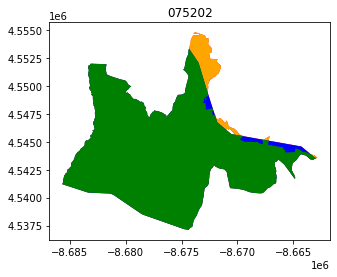

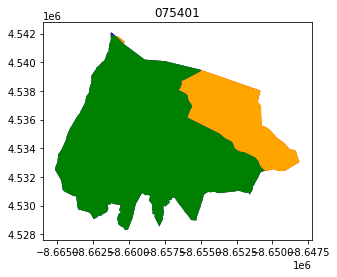

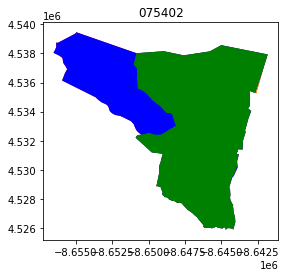

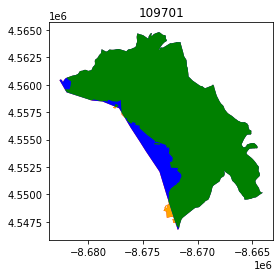

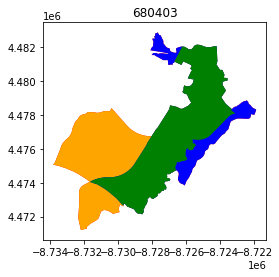

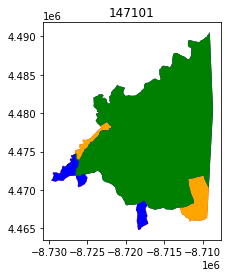

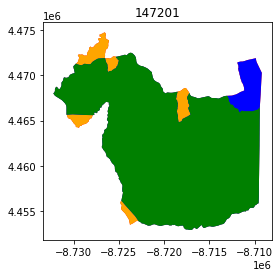

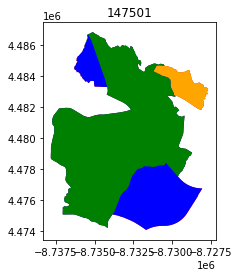

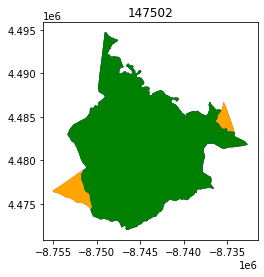

In [60]:
shp_total_validation(df_with_absentee_reallocated, shp, gdfv, "unique_id")

## Election Results

In [58]:
validater_row(shp_gdfv_merge,column_list, "unique_id")


There are  150  total rows
19  of these rows have election result differences
131  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 10
